# K-Means Clustering (K-Means)

## Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import os


# importing the data


In [3]:

os.getcwd()

'C:\\Users\\abhi\\Machine Learning A-Z (Model Selection)\\Classification'

In [4]:
os.chdir('C:\\Users\\abhi')

In [5]:
os.getcwd()

'C:\\Users\\abhi'

In [6]:
df = pd.read_csv('intern.csv')

In [7]:
df =df.loc[df['Country'].str.contains('United Kingdom')]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [8]:
df["Total"] =pd.DataFrame(df['Quantity']*df['UnitPrice'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


## Data Wrangling

In [9]:
df.describe()

,Quantity,UnitPrice,CustomerID,Total
count,495478.000000,495478.000000,361878.000000,495478.000000
mean,8.605486,4.532422,15547.871368,16.525065
std,227.588756,99.315438,1594.402590,394.839116
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,14194.000000,3.290000
50%,3.000000,2.100000,15514.000000,8.290000
75%,10.000000,4.130000,16931.000000,16.630000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [10]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


Geeting to know about the data types and other relavant information from data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495478 entries, 0 to 541893
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    495478 non-null  object 
 1   StockCode    495478 non-null  object 
 2   Description  494024 non-null  object 
 3   Quantity     495478 non-null  int64  
 4   InvoiceDate  495478 non-null  object 
 5   UnitPrice    495478 non-null  float64
 6   CustomerID   361878 non-null  float64
 7   Country      495478 non-null  object 
 8   Total        495478 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 37.8+ MB


In [12]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['year'] = pd.to_datetime(df['InvoiceDate']).dt.year
df['Month'] = pd.to_datetime(df['InvoiceDate']).dt.month
df['Month_name'] = pd.to_datetime(df['InvoiceDate']).dt.month_name()
df['date_day'] = pd.to_datetime(df['InvoiceDate']).dt.day
df['Day_name'] = pd.to_datetime(df['InvoiceDate']).dt.day_name()
df['Day_is_weekend'] =np.where(df['Day_name'].isin(['Sunday','Saturday']),1,0)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495478 entries, 0 to 541893
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   InvoiceNo       495478 non-null  object        
 1   StockCode       495478 non-null  object        
 2   Description     494024 non-null  object        
 3   Quantity        495478 non-null  int64         
 4   InvoiceDate     495478 non-null  datetime64[ns]
 5   UnitPrice       495478 non-null  float64       
 6   CustomerID      361878 non-null  float64       
 7   Country         495478 non-null  object        
 8   Total           495478 non-null  float64       
 9   year            495478 non-null  int64         
 10  Month           495478 non-null  int64         
 11  Month_name      495478 non-null  object        
 12  date_day        495478 non-null  int64         
 13  Day_name        495478 non-null  object        
 14  Day_is_weekend  495478 non-null  int

In [14]:
df.nunique()

InvoiceNo         23494
StockCode          4065
Description        4202
Quantity            715
InvoiceDate       21220
UnitPrice          1574
CustomerID         3950
Country               1
Total              5954
year                  2
Month                12
Month_name           12
date_day             31
Day_name              6
Day_is_weekend        2
dtype: int64

# missing value 

In [15]:
miss_values =df.isnull().sum()
miss_values

InvoiceNo              0
StockCode              0
Description         1454
Quantity               0
InvoiceDate            0
UnitPrice              0
CustomerID        133600
Country                0
Total                  0
year                   0
Month                  0
Month_name             0
date_day               0
Day_name               0
Day_is_weekend         0
dtype: int64

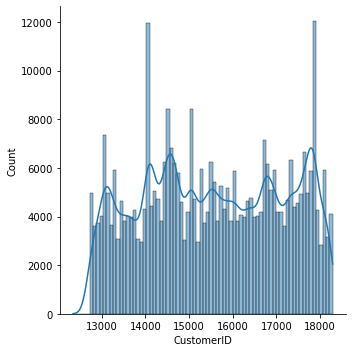

In [16]:
sns.displot(df["CustomerID"],kde=True)


In [17]:
df.corr()


,Quantity,UnitPrice,CustomerID,Total,year,Month,date_day,Day_is_weekend
Quantity,1.000000,-0.000994,-0.000844,0.888696,0.001534,-0.000241,-0.000621,-0.003073
UnitPrice,-0.000994,1.000000,-0.000828,-0.165405,-0.005219,-0.000064,-0.003067,-0.006353
CustomerID,-0.000844,-0.000828,1.000000,0.001458,-0.032478,0.020672,-0.002801,0.006978
Total,0.888696,-0.165405,0.001458,1.000000,-0.000256,0.001023,-0.000847,-0.004709
year,0.001534,-0.005219,-0.032478,-0.000256,1.000000,-0.373350,0.168157,0.012928
Month,-0.000241,-0.000064,0.020672,0.001023,-0.373350,1.000000,-0.120764,0.028850
date_day,-0.000621,-0.003067,-0.002801,-0.000847,0.168157,-0.120764,1.000000,0.030840
Day_is_weekend,-0.003073,-0.006353,0.006978,-0.004709,0.012928,0.028850,0.030840,1.000000


<AxesSubplot:>

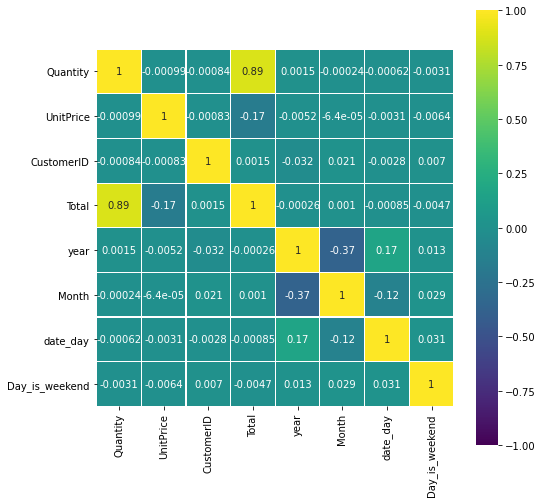

In [18]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),cmap='viridis',vmin=-1,center=None,robust=False,annot=True,linewidths=.1,square =True)

<AxesSubplot:>

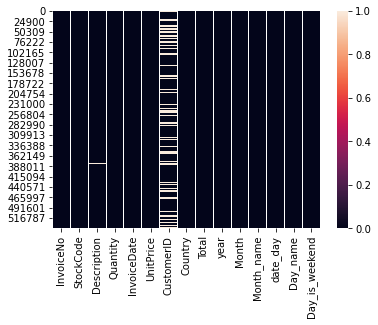

In [19]:
sns.heatmap(df.isnull())

In [20]:
df =df.drop(['Description'],axis =1)
df =df.drop(['CustomerID'],axis =1)
#df =df.drop(['InvoiceNo'],axis =1)
df =df.drop(['StockCode'],axis =1)
df =df.drop(['InvoiceDate'],axis =1)

<AxesSubplot:>

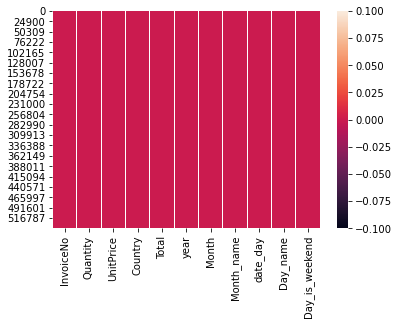

In [21]:
sns.heatmap(df.isnull())

In [22]:
df =df.drop_duplicates()


In [23]:
df.head()

,InvoiceNo,Quantity,UnitPrice,Country,Total,year,Month,Month_name,date_day,Day_name,Day_is_weekend
0,536365,6,2.55,United Kingdom,15.30,2010,12,December,1,Wednesday,0
1,536365,6,3.39,United Kingdom,20.34,2010,12,December,1,Wednesday,0
2,536365,8,2.75,United Kingdom,22.00,2010,12,December,1,Wednesday,0
5,536365,2,7.65,United Kingdom,15.30,2010,12,December,1,Wednesday,0
6,536365,6,4.25,United Kingdom,25.50,2010,12,December,1,Wednesday,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275419 entries, 0 to 541893
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   InvoiceNo       275419 non-null  object 
 1   Quantity        275419 non-null  int64  
 2   UnitPrice       275419 non-null  float64
 3   Country         275419 non-null  object 
 4   Total           275419 non-null  float64
 5   year            275419 non-null  int64  
 6   Month           275419 non-null  int64  
 7   Month_name      275419 non-null  object 
 8   date_day        275419 non-null  int64  
 9   Day_name        275419 non-null  object 
 10  Day_is_weekend  275419 non-null  int32  
dtypes: float64(2), int32(1), int64(4), object(4)
memory usage: 24.2+ MB


In [25]:
df.head()

,InvoiceNo,Quantity,UnitPrice,Country,Total,year,Month,Month_name,date_day,Day_name,Day_is_weekend
0,536365,6,2.55,United Kingdom,15.30,2010,12,December,1,Wednesday,0
1,536365,6,3.39,United Kingdom,20.34,2010,12,December,1,Wednesday,0
2,536365,8,2.75,United Kingdom,22.00,2010,12,December,1,Wednesday,0
5,536365,2,7.65,United Kingdom,15.30,2010,12,December,1,Wednesday,0
6,536365,6,4.25,United Kingdom,25.50,2010,12,December,1,Wednesday,0


# Univariate analysis


(-25000.0, 25000.0)

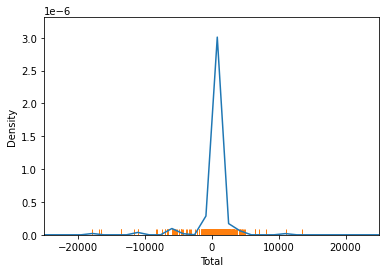

In [26]:
sns.kdeplot(data=df, x="Total")
sns.rugplot(data=df, x="Total")
plt.xlim(-25000,25000)

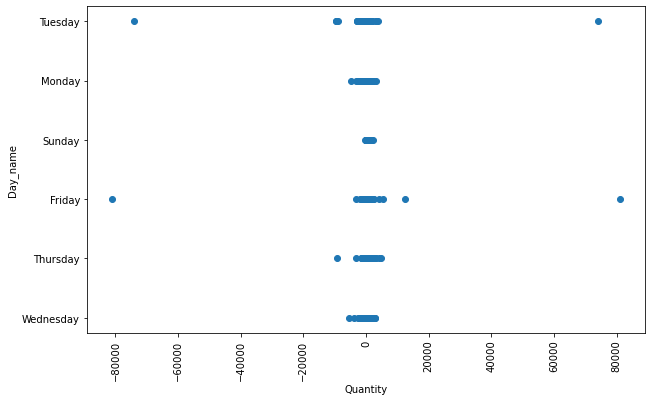

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Quantity'],df['Day_name'])
plt.xticks(rotation = 90)
plt.xlabel('Quantity')
plt.ylabel('Day_name')
plt.show()

<AxesSubplot:xlabel='Quantity', ylabel='Day_name'>

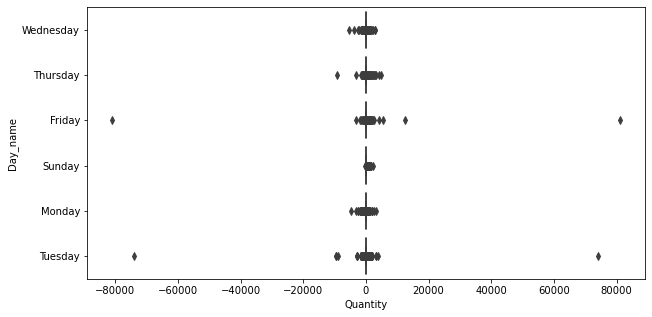

In [28]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Quantity", y="Day_name")

C:\Users\abhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


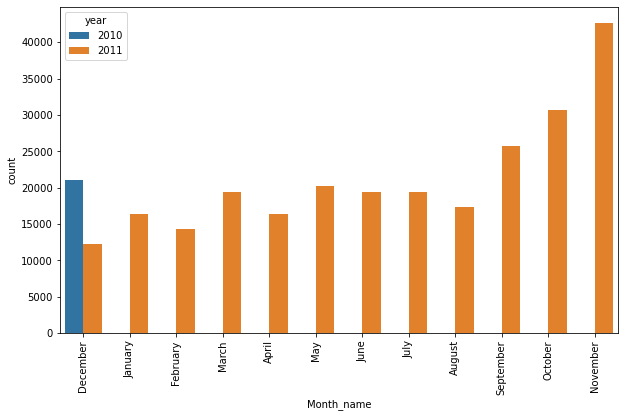

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(df['Month_name'],hue =df['year'])
plt.xticks(rotation = 90)
plt.show()

C:\Users\abhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


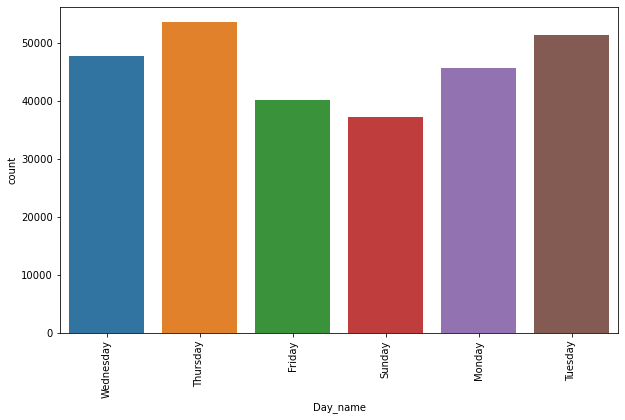

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(df['Day_name'])
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:xlabel='UnitPrice', ylabel='Day_name'>

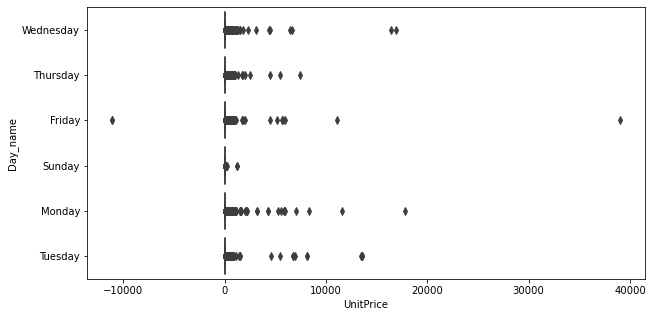

In [31]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="UnitPrice", y="Day_name")

In [32]:
from scipy import stats
df['zscore_UnitPrice']= np.abs(stats.zscore(df['UnitPrice']))
df['zscore_Quantity']= np.abs(stats.zscore(df['Quantity']))
df.head()


,InvoiceNo,Quantity,UnitPrice,Country,Total,year,Month,Month_name,date_day,Day_name,Day_is_weekend,zscore_UnitPrice,zscore_Quantity
0,536365,6,2.55,United Kingdom,15.30,2010,12,December,1,Wednesday,0,0.024210,0.015776
1,536365,6,3.39,United Kingdom,20.34,2010,12,December,1,Wednesday,0,0.017902,0.015776
2,536365,8,2.75,United Kingdom,22.00,2010,12,December,1,Wednesday,0,0.022708,0.009215
5,536365,2,7.65,United Kingdom,15.30,2010,12,December,1,Wednesday,0,0.014087,0.028898
6,536365,6,4.25,United Kingdom,25.50,2010,12,December,1,Wednesday,0,0.011444,0.015776


In [33]:
df=df[(df['zscore_UnitPrice'] < 3)]
df=df[(df['zscore_Quantity'] < 3)]



C:\Users\abhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 2160x360 with 0 Axes>

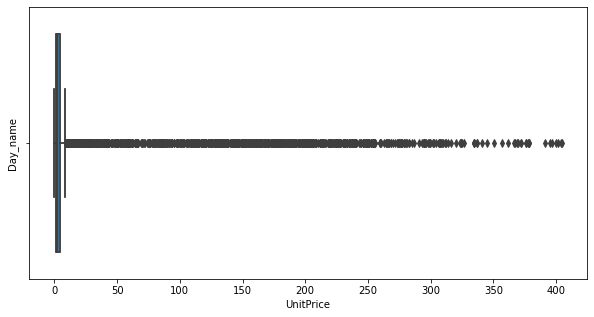

In [34]:
plt.figure(figsize=(30,5))
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="UnitPrice", y="Day_name")
outliers =sns.boxplot(df['UnitPrice'])

<AxesSubplot:xlabel='Total', ylabel='Day_name'>

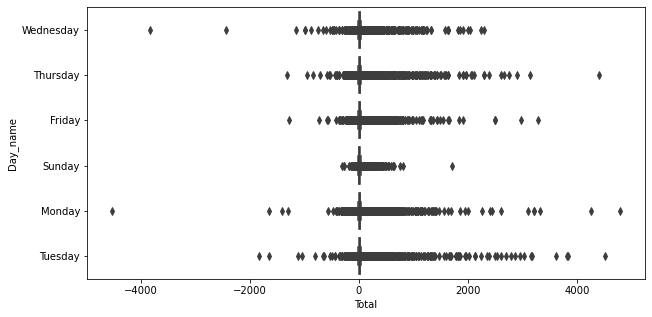

In [35]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Total", y="Day_name")

In [36]:
df['zscore_Total']= np.abs(stats.zscore(df['Total']))
df=df[(df['zscore_Total'] < 3)]

<AxesSubplot:xlabel='Total', ylabel='Day_name'>

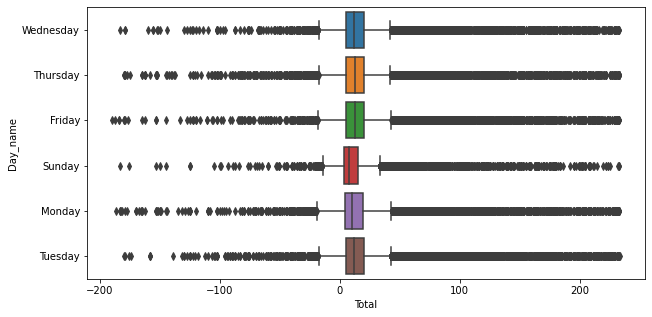

In [37]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Total", y="Day_name")


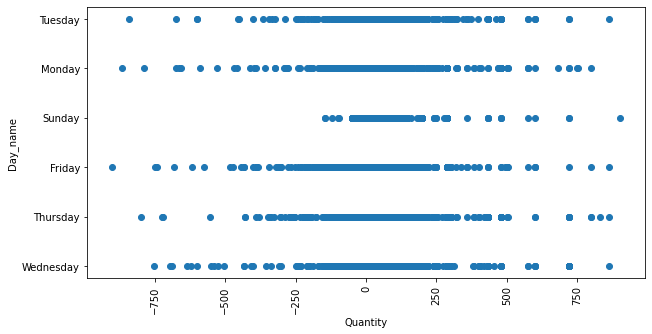

In [38]:

plt.figure(figsize=(10,5))
plt.scatter(df['Quantity'],df['Day_name'])
plt.xticks(rotation = 90)
plt.xlabel('Quantity')
plt.ylabel('Day_name')
plt.show()


C:\Users\abhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='UnitPrice', ylabel='Day_name'>

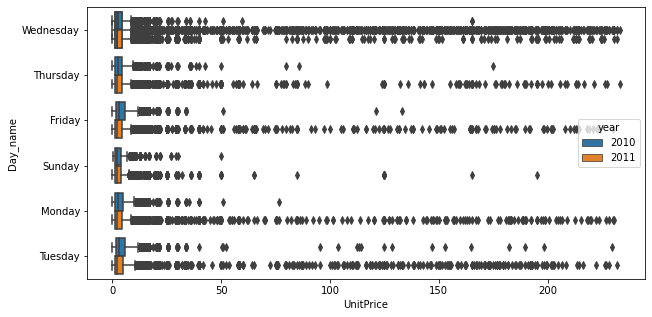

In [39]:
plt.figure(figsize=(10, 5))
outliers =sns.boxplot(df['UnitPrice'])
sns.boxplot(data=df, x="UnitPrice", y="Day_name", hue="year")

#  Bivariate Analysis

In [40]:
df1=df


In [41]:
df1.head()

,InvoiceNo,Quantity,UnitPrice,Country,Total,year,Month,Month_name,date_day,Day_name,Day_is_weekend,zscore_UnitPrice,zscore_Quantity,zscore_Total
0,536365,6,2.55,United Kingdom,15.30,2010,12,December,1,Wednesday,0,0.024210,0.015776,0.088504
1,536365,6,3.39,United Kingdom,20.34,2010,12,December,1,Wednesday,0,0.017902,0.015776,0.017081
2,536365,8,2.75,United Kingdom,22.00,2010,12,December,1,Wednesday,0,0.022708,0.009215,0.006443
5,536365,2,7.65,United Kingdom,15.30,2010,12,December,1,Wednesday,0,0.014087,0.028898,0.088504
6,536365,6,4.25,United Kingdom,25.50,2010,12,December,1,Wednesday,0,0.011444,0.015776,0.056042


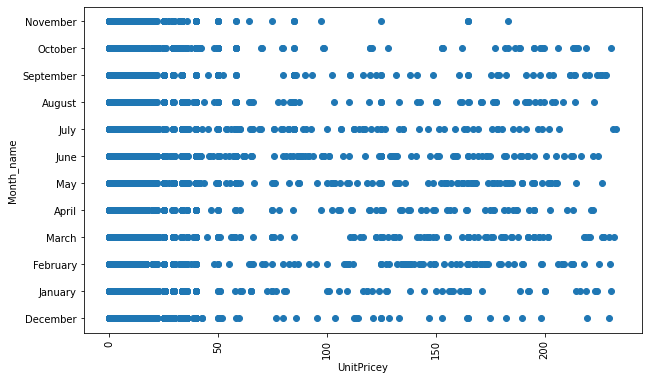

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(df1['UnitPrice'],df1['Month_name'])
plt.xticks(rotation = 90)
plt.xlabel('UnitPricey')
plt.ylabel('Month_name')
plt.show()


In [43]:
df1.head()

,InvoiceNo,Quantity,UnitPrice,Country,Total,year,Month,Month_name,date_day,Day_name,Day_is_weekend,zscore_UnitPrice,zscore_Quantity,zscore_Total
0,536365,6,2.55,United Kingdom,15.30,2010,12,December,1,Wednesday,0,0.024210,0.015776,0.088504
1,536365,6,3.39,United Kingdom,20.34,2010,12,December,1,Wednesday,0,0.017902,0.015776,0.017081
2,536365,8,2.75,United Kingdom,22.00,2010,12,December,1,Wednesday,0,0.022708,0.009215,0.006443
5,536365,2,7.65,United Kingdom,15.30,2010,12,December,1,Wednesday,0,0.014087,0.028898,0.088504
6,536365,6,4.25,United Kingdom,25.50,2010,12,December,1,Wednesday,0,0.011444,0.015776,0.056042


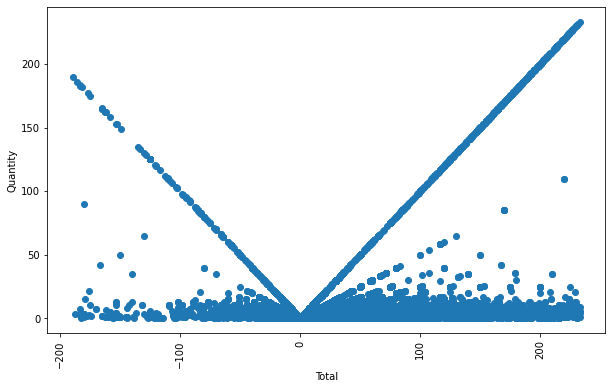

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(df1['Total'],df1['UnitPrice'])
plt.xticks(rotation = 90)
plt.xlabel('Total')
plt.ylabel('Quantity')
plt.show()


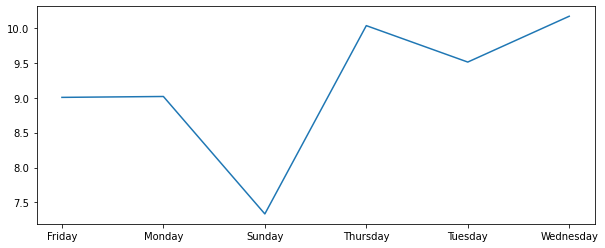

In [45]:
a  = df1.groupby('Day_name').Quantity.mean()
plt.figure(figsize=(10, 4))
plt.plot(a)


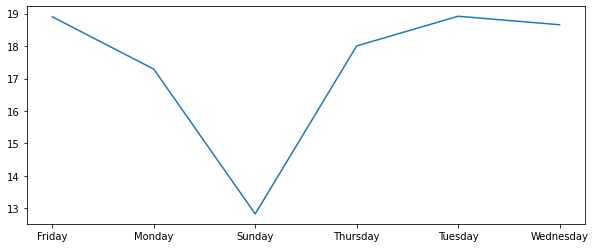

In [46]:
a  = df1.groupby('Day_name').Total.mean()
plt.figure(figsize=(10, 4))
plt.plot(a)

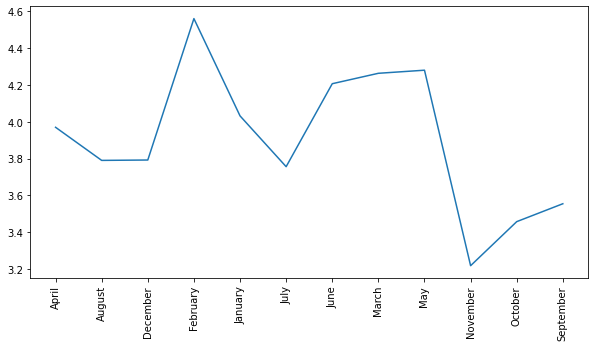

In [47]:
a  = df1.groupby('Month_name').UnitPrice.mean()
plt.figure(figsize=(10, 5))
plt.xticks(rotation = 90)
plt.plot(a)


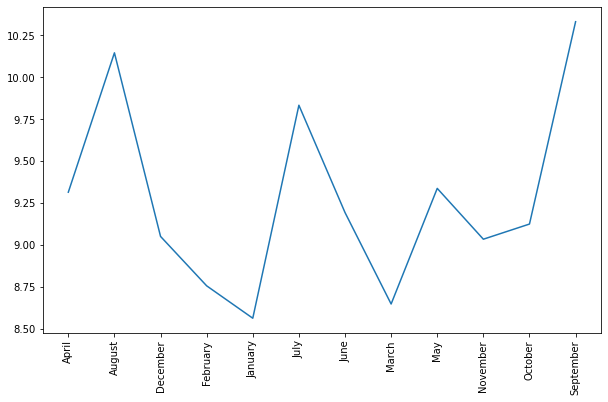

In [48]:
a=df1.groupby('Month_name').Quantity.mean()
plt.figure(figsize=(10, 6))
plt.xticks(rotation = 90)
plt.plot(a)

In [49]:
#a  = df1.groupby('Day_is_weekend').UnitPrice.mean()
#plt.figure(figsize=(10, 6))
#plt.plot(a)

(-300.0, 300.0)

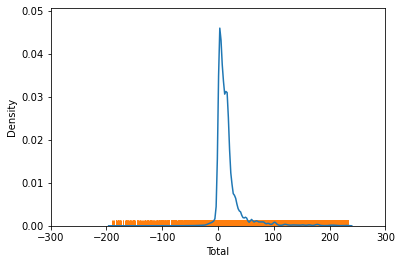

In [50]:
sns.kdeplot(data=df1, x="Total")
sns.rugplot(data=df1, x="Total")
plt.xlim(-300,300)

<AxesSubplot:xlabel='Month_name', ylabel='Quantity'>

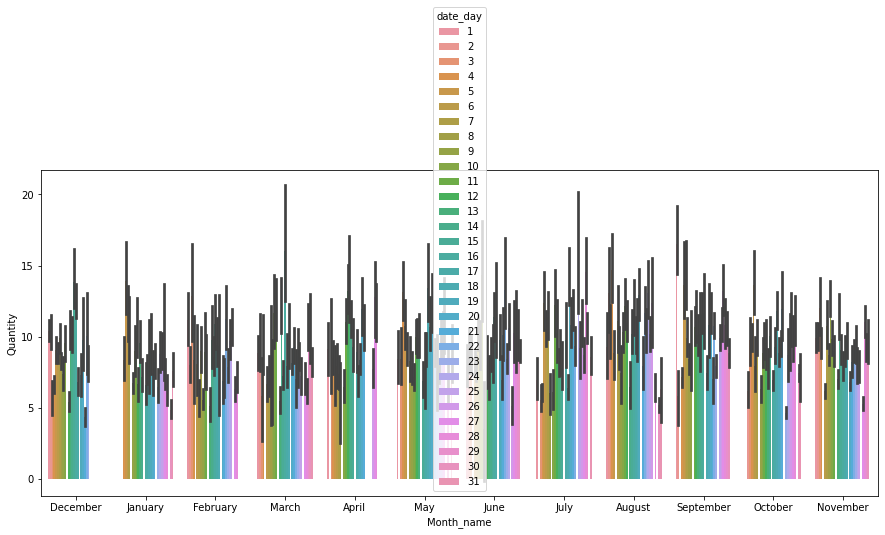

In [51]:
plt.figure(figsize=(15, 6))

sns.barplot(x= df1['Month_name'], y = df1['Quantity'], hue = df1['date_day'],dodge =2)

In [52]:
df1.head()

,InvoiceNo,Quantity,UnitPrice,Country,Total,year,Month,Month_name,date_day,Day_name,Day_is_weekend,zscore_UnitPrice,zscore_Quantity,zscore_Total
0,536365,6,2.55,United Kingdom,15.30,2010,12,December,1,Wednesday,0,0.024210,0.015776,0.088504
1,536365,6,3.39,United Kingdom,20.34,2010,12,December,1,Wednesday,0,0.017902,0.015776,0.017081
2,536365,8,2.75,United Kingdom,22.00,2010,12,December,1,Wednesday,0,0.022708,0.009215,0.006443
5,536365,2,7.65,United Kingdom,15.30,2010,12,December,1,Wednesday,0,0.014087,0.028898,0.088504
6,536365,6,4.25,United Kingdom,25.50,2010,12,December,1,Wednesday,0,0.011444,0.015776,0.056042


In [53]:
df1 =df1.drop(['year','Month','zscore_Quantity','zscore_UnitPrice','Country','date_day','zscore_Total'],axis =1)
df1.head()

,InvoiceNo,Quantity,UnitPrice,Total,Month_name,Day_name,Day_is_weekend
0,536365,6,2.55,15.30,December,Wednesday,0
1,536365,6,3.39,20.34,December,Wednesday,0
2,536365,8,2.75,22.00,December,Wednesday,0
5,536365,2,7.65,15.30,December,Wednesday,0
6,536365,6,4.25,25.50,December,Wednesday,0


<Figure size 720x432 with 0 Axes>

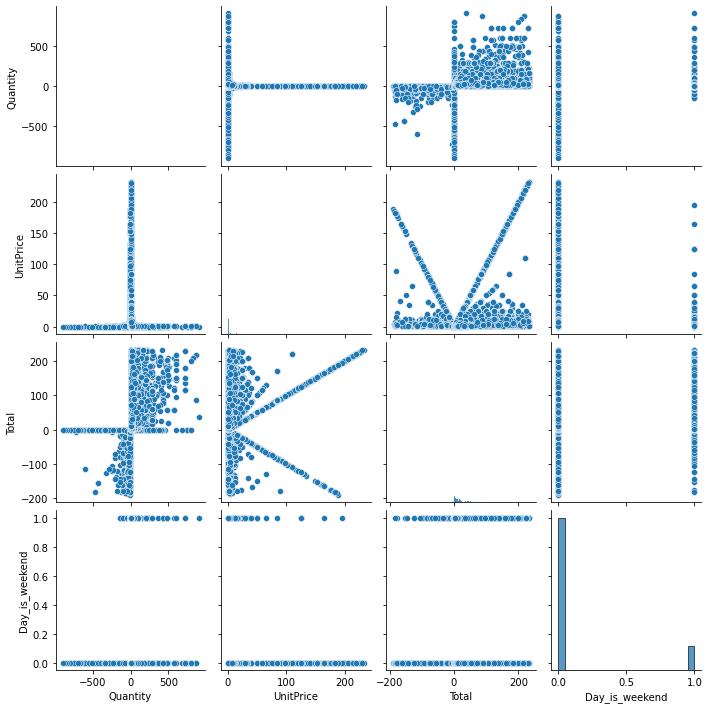

<Figure size 720x432 with 0 Axes>

In [54]:
sns.pairplot(df1)
plt.figure(figsize=(10, 6))

In [55]:
df1.corr()


,Quantity,UnitPrice,Total,Day_is_weekend
Quantity,1.000000,-0.087287,0.483402,-0.030918
UnitPrice,-0.087287,1.000000,0.247293,-0.036519
Total,0.483402,0.247293,1.000000,-0.071171
Day_is_weekend,-0.030918,-0.036519,-0.071171,1.000000


# Data Preprocessing

In [56]:
df2=df1
df2.head()

,InvoiceNo,Quantity,UnitPrice,Total,Month_name,Day_name,Day_is_weekend
0,536365,6,2.55,15.30,December,Wednesday,0
1,536365,6,3.39,20.34,December,Wednesday,0
2,536365,8,2.75,22.00,December,Wednesday,0
5,536365,2,7.65,15.30,December,Wednesday,0
6,536365,6,4.25,25.50,December,Wednesday,0


In [57]:
df2.Month_name.unique()

array(['December', 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November'], dtype=object)

In [58]:
df2['Month_name'] = df2['Month_name'].replace({'January':1, 'February':2, 'March':3, 'April':4, 'May':5 ,'June':6,
                                              'July':7, 'August':8, 'September':9, 'October':10, 'November':11,'December':12})

In [59]:
df2.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272528 entries, 0 to 541893
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   InvoiceNo       272528 non-null  object 
 1   Quantity        272528 non-null  int64  
 2   UnitPrice       272528 non-null  float64
 3   Total           272528 non-null  float64
 4   Month_name      272528 non-null  int64  
 5   Day_name        272528 non-null  object 
 6   Day_is_weekend  272528 non-null  int32  
dtypes: float64(2), int32(1), int64(2), object(2)
memory usage: 23.7+ MB


In [60]:
# Use the str.extract() method to extract any integers from the string and create a new column in the DataFrame
df2["InvoiceNo"] = df2["InvoiceNo"].str.extract('(\d+)', expand=False)
# Use the astype() method to convert the extracted integers to numeric values
df2["InvoiceNo"]  = df2["InvoiceNo"].astype(float)
# Now we can use the resulting Series of numeric values as a feature for your machine learning model
df2

,InvoiceNo,Quantity,UnitPrice,Total,Month_name,Day_name,Day_is_weekend
0,536365.0,6,2.55,15.30,12,Wednesday,0
1,536365.0,6,3.39,20.34,12,Wednesday,0
2,536365.0,8,2.75,22.00,12,Wednesday,0
5,536365.0,2,7.65,15.30,12,Wednesday,0
6,536365.0,6,4.25,25.50,12,Wednesday,0
...,...,...,...,...,...,...,...
541888,581585.0,12,0.95,11.40,12,Friday,0
541890,581586.0,8,2.95,23.60,12,Friday,0
541891,581586.0,24,1.25,30.00,12,Friday,0
541892,581586.0,24,8.95,214.80,12,Friday,0


In [61]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272528 entries, 0 to 541893
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   InvoiceNo       272528 non-null  float64
 1   Quantity        272528 non-null  int64  
 2   UnitPrice       272528 non-null  float64
 3   Total           272528 non-null  float64
 4   Month_name      272528 non-null  int64  
 5   Day_name        272528 non-null  object 
 6   Day_is_weekend  272528 non-null  int32  
dtypes: float64(3), int32(1), int64(2), object(1)
memory usage: 23.7+ MB


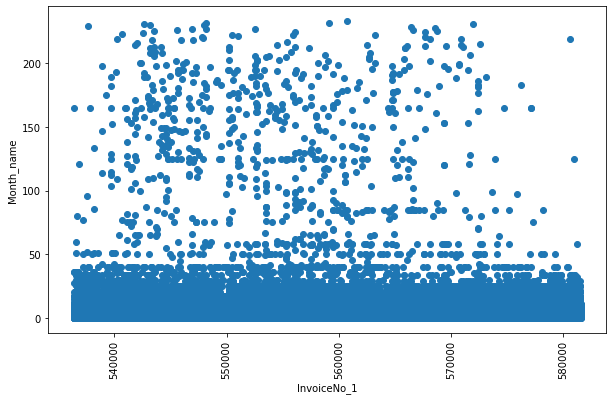

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(df2['InvoiceNo'],df2['UnitPrice'])
plt.xticks(rotation = 90)
plt.xlabel('InvoiceNo_1')
plt.ylabel('Month_name')
plt.show()


In [63]:
#sns.displot(df9['InvoiceNo_1'],bins =40z000)

In [64]:
df2.corr()

,InvoiceNo,Quantity,UnitPrice,Total,Month_name,Day_is_weekend
InvoiceNo,1.000000,0.008281,-0.043631,-0.009967,0.639858,0.038615
Quantity,0.008281,1.000000,-0.087287,0.483402,0.005449,-0.030918
UnitPrice,-0.043631,-0.087287,1.000000,0.247293,-0.037778,-0.036519
Total,-0.009967,0.483402,0.247293,1.000000,0.003402,-0.071171
Month_name,0.639858,0.005449,-0.037778,0.003402,1.000000,0.033769
Day_is_weekend,0.038615,-0.030918,-0.036519,-0.071171,0.033769,1.000000


In [65]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272528 entries, 0 to 541893
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   InvoiceNo       272528 non-null  float64
 1   Quantity        272528 non-null  int64  
 2   UnitPrice       272528 non-null  float64
 3   Total           272528 non-null  float64
 4   Month_name      272528 non-null  int64  
 5   Day_name        272528 non-null  object 
 6   Day_is_weekend  272528 non-null  int32  
dtypes: float64(3), int32(1), int64(2), object(1)
memory usage: 23.7+ MB


In [66]:
df2.Day_name.unique()

array(['Wednesday', 'Thursday', 'Friday', 'Sunday', 'Monday', 'Tuesday'],
      dtype=object)

In [67]:
df2['Day_name'] = df2['Day_name'].replace({'Wednesday':3,
                                            'Thursday':4,'Friday':5,'Sunday':6, 'Monday':1,'Tuesday':2})

In [68]:
df2

,InvoiceNo,Quantity,UnitPrice,Total,Month_name,Day_name,Day_is_weekend
0,536365.0,6,2.55,15.30,12,3,0
1,536365.0,6,3.39,20.34,12,3,0
2,536365.0,8,2.75,22.00,12,3,0
5,536365.0,2,7.65,15.30,12,3,0
6,536365.0,6,4.25,25.50,12,3,0
...,...,...,...,...,...,...,...
541888,581585.0,12,0.95,11.40,12,5,0
541890,581586.0,8,2.95,23.60,12,5,0
541891,581586.0,24,1.25,30.00,12,5,0
541892,581586.0,24,8.95,214.80,12,5,0


## Feature Scaling

In [69]:
X = df2.iloc[:,0:].values
X

array([[5.36365e+05, 6.00000e+00, 2.55000e+00, ..., 1.20000e+01,
        3.00000e+00, 0.00000e+00],
       [5.36365e+05, 6.00000e+00, 3.39000e+00, ..., 1.20000e+01,
        3.00000e+00, 0.00000e+00],
       [5.36365e+05, 8.00000e+00, 2.75000e+00, ..., 1.20000e+01,
        3.00000e+00, 0.00000e+00],
       ...,
       [5.81586e+05, 2.40000e+01, 1.25000e+00, ..., 1.20000e+01,
        5.00000e+00, 0.00000e+00],
       [5.81586e+05, 2.40000e+01, 8.95000e+00, ..., 1.20000e+01,
        5.00000e+00, 0.00000e+00],
       [5.81586e+05, 1.00000e+01, 7.08000e+00, ..., 1.20000e+01,
        5.00000e+00, 0.00000e+00]])

In [70]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-1.76730461, -0.13138137, -0.15427307, ...,  1.28759668,
        -0.22938421, -0.39726122],
       [-1.76730461, -0.13138137, -0.0509397 , ...,  1.28759668,
        -0.22938421, -0.39726122],
       [-1.76730461, -0.05114765, -0.12966988, ...,  1.28759668,
        -0.22938421, -0.39726122],
       ...,
       [ 1.63388136,  0.59072217, -0.31419376, ...,  1.28759668,
         0.98634922, -0.39726122],
       [ 1.63388136,  0.59072217,  0.63302879, ...,  1.28759668,
         0.98634922, -0.39726122],
       [ 1.63388136,  0.02908608,  0.40298903, ...,  1.28759668,
         0.98634922, -0.39726122]])

# Usnig PCA

In [71]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X = pca.fit_transform(X)
X


array([[ 0.46399867, -0.11383248],
       [ 0.52637234, -0.05354649],
       [ 0.54261378, -0.01711854],
       ...,
       [-1.37943433,  1.69460861],
       [ 0.46089496,  3.77594277],
       [-0.98723126,  2.02533624]])

# Using the elbow method to find the optimal number of clusters


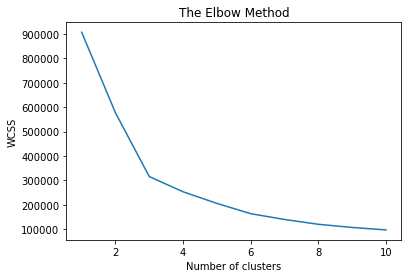

In [72]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#  Training the K-Means model on the dataset

In [73]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([0, 0, 0, ..., 1, 1, 1])

# Visualising the clusters



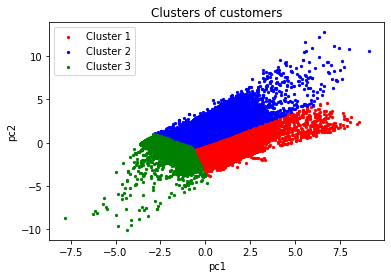

In [74]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 5, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 5, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 5, c = 'green', label = 'Cluster 3')
plt.title('Clusters of customers')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.legend()
plt.show()